# 第3回レポート

In [1]:
import numpy as np # 数値計算で使用
import matplotlib.pyplot as plt # グラフ描画で使用
import scienceplots # グラフ描画のテーマ

np.random.seed(111) # 乱数のシードを固定

In [2]:
def generate_Z(n: int, k: int, mu: float, sigma: float) -> np.ndarray:
    """確率変数列Zを生成する関数

    Args:
        n (int): Zの1つの生成に使用する一様乱数のサンプル数
        k (int): 生成するZのサンプル数
        mu (float): 一様乱数の平均
        sigma (float): 一様乱数の標準偏差

    Returns:
        Z (np.ndarray): 生成したZのサンプル列, shape=(k, )
    """
    
    X = np.random.rand(k, n) # 一様乱数を生成, shape=(k, n)
    Z = (np.sum(X, axis=1) - n * mu) / (np.sqrt(n) * sigma), # Zを生成, shape=(k, )
    return Z

Z = generate_Z(500, 10000, 0.5, np.sqrt(1/12)) # Zを生成, shape=(10000, )

In [3]:
def norm(x: np.ndarray, mu: float, sigma: float) -> np.ndarray:
    """正規分布の確率密度関数

    Args:
        x (np.ndarray): 確率変数
        mu (float): 平均
        sigma (float): 標準偏差

    Returns:
        y (np.ndarray): 正規分布の確率密度関数の値, shape=(len(x), )
    """
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2)) # 正規分布の確率密度関数
    return y

bins = 50 # ヒストグラムの階級数

# 理論度数分布
x = np.linspace(np.min(Z), np.max(Z), bins) # Zの最小値から最大値を50個の区間に分割, shape=(50, )
# y = norm.pdf(x, loc=0, scale=1) # 平均0, 標準偏差1の正規分布, shape=(50, )
y = norm(x, 0, 1) # 平均0, 標準偏差1の正規分布（標準正規分布）, shape=(50, )
y = y * 10000 / sum(y) # 確率密度を理論度数に変換, shape=(50, )

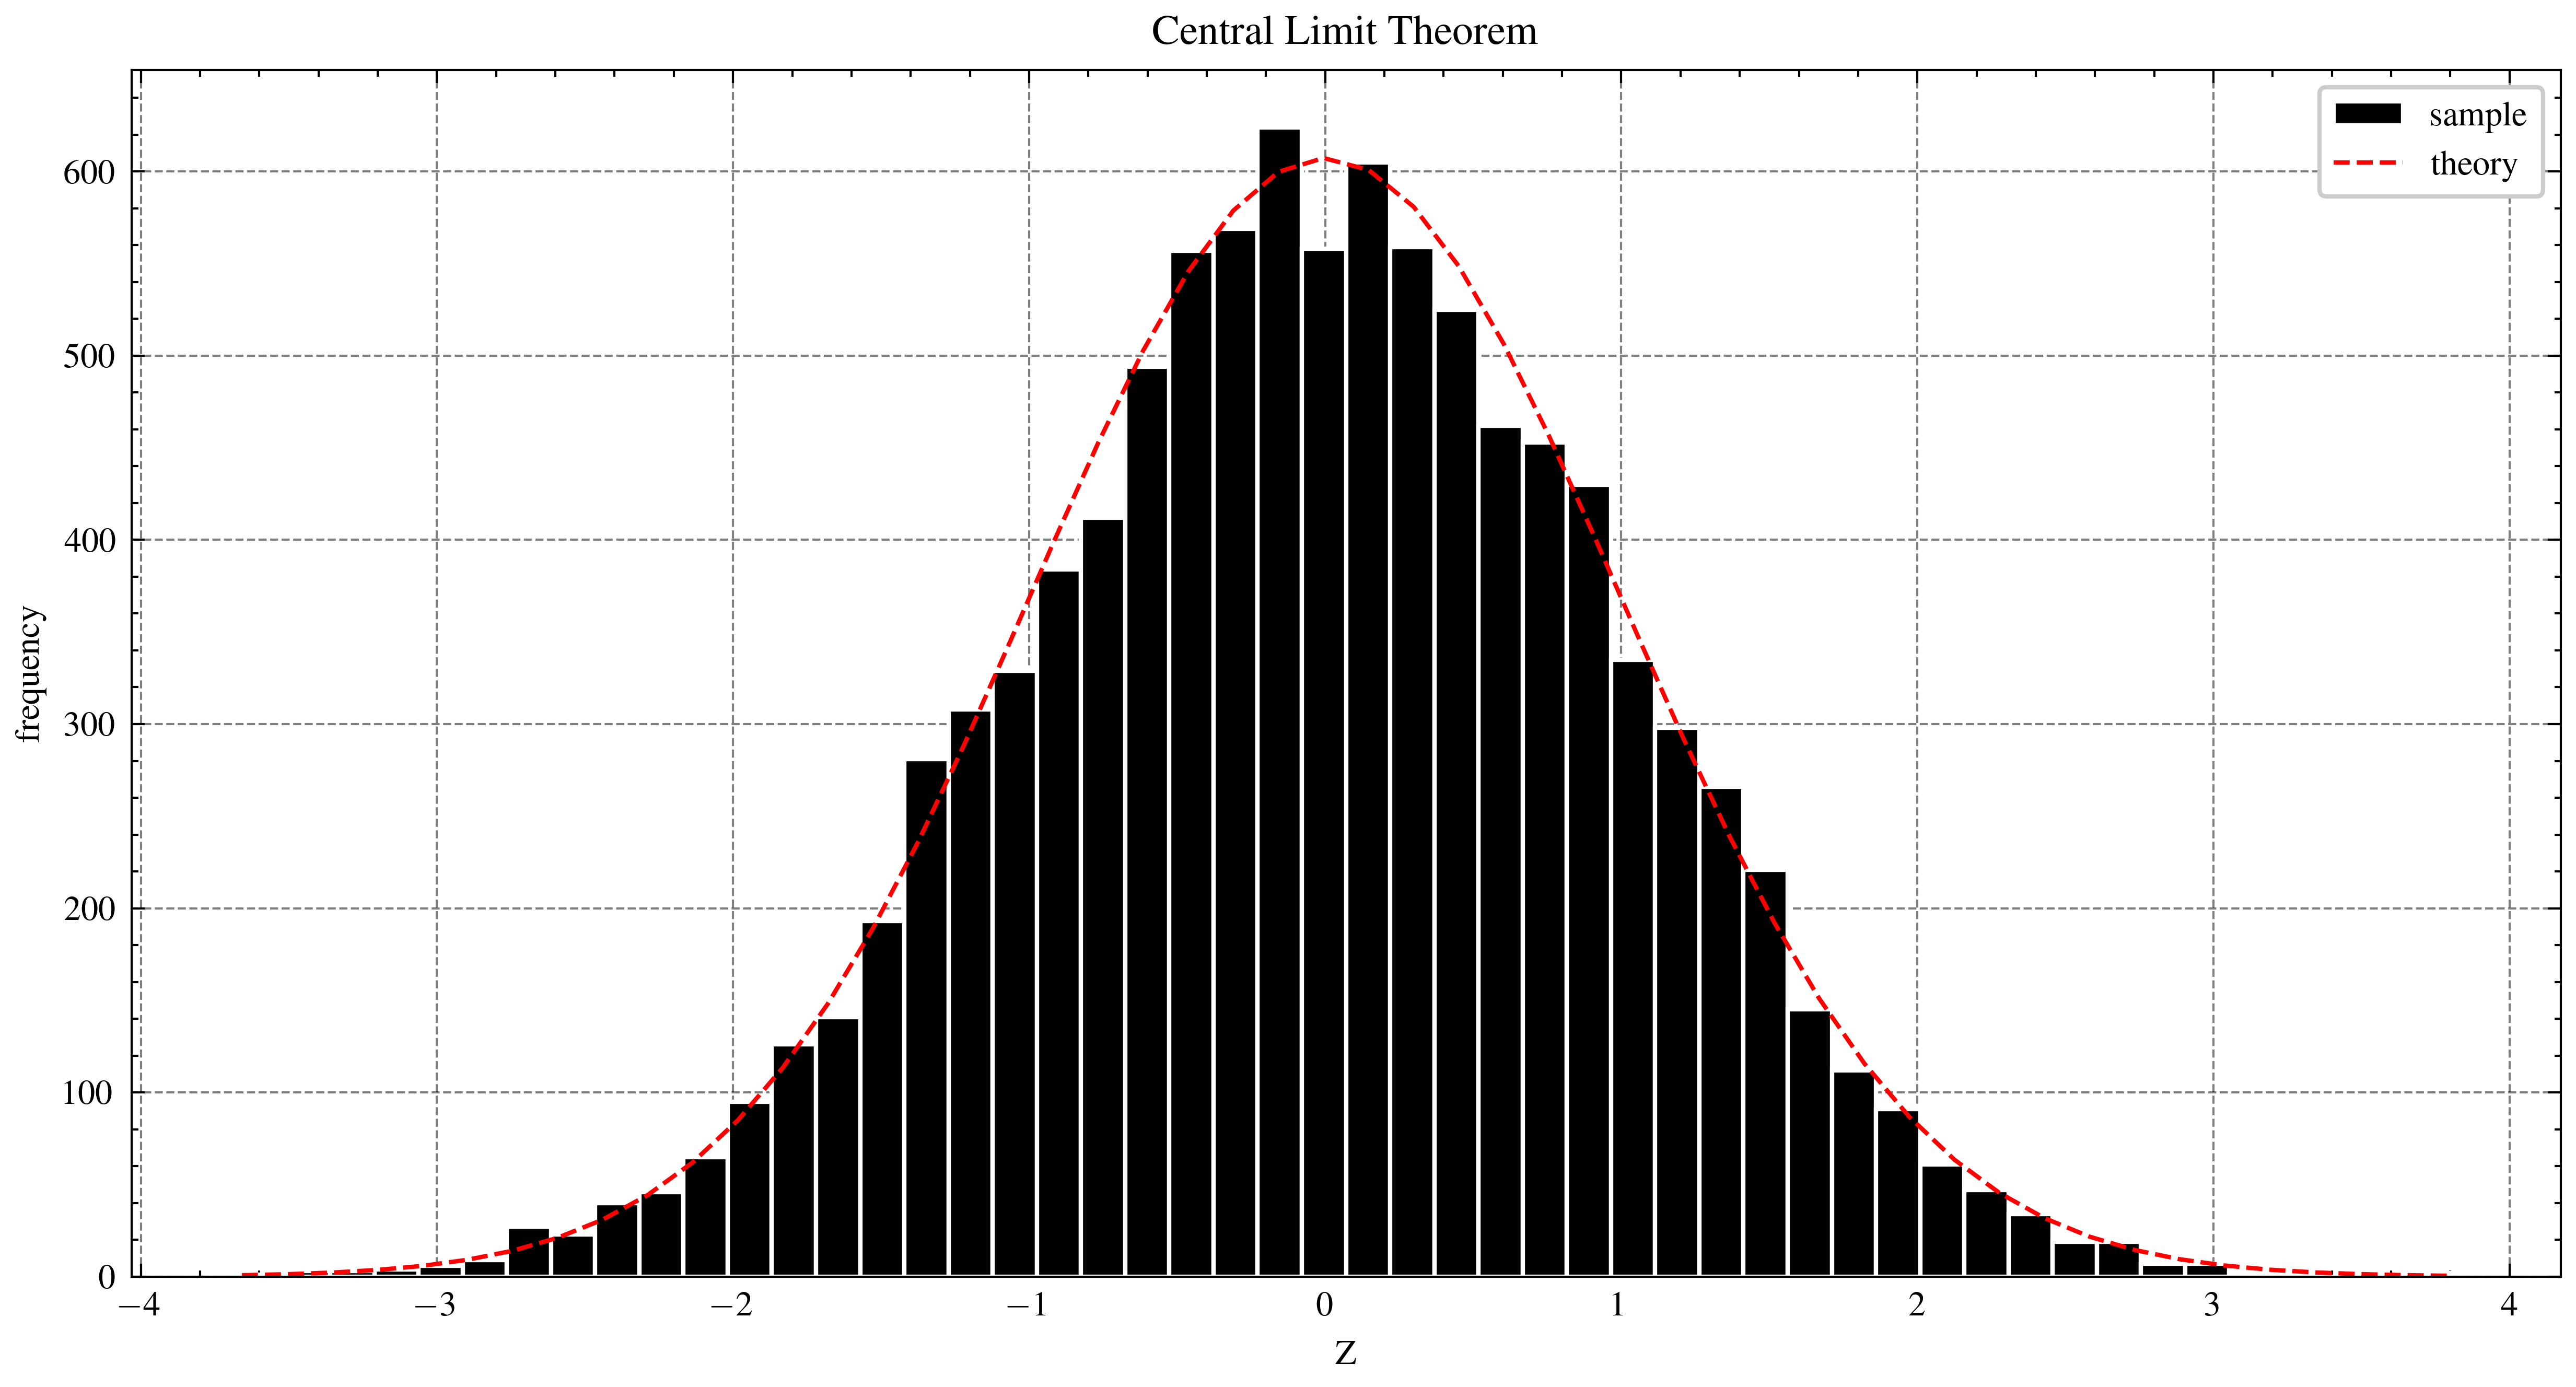

In [4]:
plt.style.use(['science', "ieee", 'grid']) # tex環境がある場合はこちらを使用
# plt.style.use(['science', "grid", 'no-latex']) # tex環境がない場合はこちらを使用


plt.figure(figsize=(10, 5)) # グラフのサイズを指定

plt.hist(Z, bins=bins, histtype="bar", label='sample', edgecolor='white') # ヒストグラムを描画
plt.plot(x, y, label='theory') # 理論度数分布を描画
plt.xlabel('Z') # x軸のラベル
plt.ylabel('frequency') # y軸のラベル
plt.title('Central Limit Theorem') # グラフのタイトル
plt.legend() # 凡例を表示
plt.savefig('report3.png', dpi=600) # グラフを保存
plt.show() # グラフを表示